In [1]:
import numpy as np
from Turtlebot_Kinematics import *
import matplotlib.pyplot as plt


In [2]:
MAX_V = 22.2
translate_differential_drive(MAX_V, -MAX_V)

(0.0, -2.775)

In [3]:
from run_util import load_ENV
from environment import Environment
from time import time

In [4]:
ENV = load_ENV("simple", False)
ENV.set_robo_state(np.array([1000, 400, np.pi / 4]))

loading simple


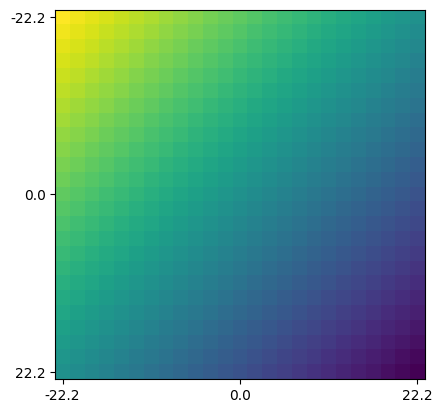

0.05000019073486328


In [5]:
dt = 1 / 20
v_space = np.linspace(-MAX_V, MAX_V, 25)
sensor_fusion = ENV.get_sensor_fusion()

# DWA like grid sampling
start_time = time()
fitness_grid = np.array([
    [ENV.fitness_single(pos=move_turtle(ENV.robo_state ,*translate_differential_drive(v_left, v_right), dt)[:2], sensor_fusion=sensor_fusion) for v_left in v_space]
    for v_right in v_space
])
process_time = time() - start_time

# rendering
fig, ax = plt.subplots()
im = ax.imshow(fitness_grid)
tick_locs = [0, int(len(v_space)/2), len(v_space)-1]
labels = [round(v, 1) for v in v_space[tick_locs]]
ax.set_xticks(tick_locs, labels=labels)
ax.set_yticks(tick_locs, labels=labels)
plt.show()
print(process_time)